First, we import the packages that will help us in analysing the document.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import calculos as calc

In [34]:
df1 = pd.read_csv('beauty_cosmetics.csv', sep=',')

In [35]:
df1.head(10)

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany
5,Super Eye Shadow,Danessa Myricks,Foundation,Weekly,135.82,3.2,9405,150ml,Sensitive,Female,Compact,Glycerin,True,UK
6,Super Lip Gloss,Bourjois,Powder,Monthly,148.99,2.5,2423,250ml,Normal,Female,Jar,Hyaluronic Acid,True,Germany
7,Ultra Cleanser,Bourjois,Lip Gloss,Daily,21.43,4.3,8032,200ml,Sensitive,Male,Bottle,Vitamin C,True,Italy
8,Magic Highlighter,IT Cosmetics,CC Cream,Occasional,113.09,3.3,2468,200ml,Combination,Unisex,Compact,Vitamin C,True,Germany
9,Perfect Bronzer,Fenty Beauty,Face Mask,Weekly,133.57,4.4,4127,150ml,Dry,Female,Compact,Hyaluronic Acid,False,Japan


In [37]:
df1.Product_Size = df1.Product_Size.str.replace("ml", "", regex=False)
df1.Product_Size = df1.Product_Size.str.replace(" ", "", regex=False).astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  int64  
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.5+ MB


In [6]:
df1.isnull().sum()

Product_Name         0
Brand                0
Category             0
Usage_Frequency      0
Price_USD            0
Rating               0
Number_of_Reviews    0
Product_Size         0
Skin_Type            0
Gender_Target        0
Packaging_Type       0
Main_Ingredient      0
Cruelty_Free         0
Country_of_Origin    0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  int64  
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 1.5+ MB


In [8]:
df1.describe(exclude=['object', 'bool'])

,Price_USD,Rating,Number_of_Reviews,Product_Size
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333,129.233333
std,40.402983,1.168029,2855.665464,78.544405
min,10.000000,1.000000,52.000000,30.000000
25%,45.480000,2.000000,2562.000000,50.000000
50%,80.040000,3.000000,5002.000000,100.000000
75%,114.760000,4.000000,7497.000000,200.000000
max,149.990000,5.000000,10000.000000,250.000000


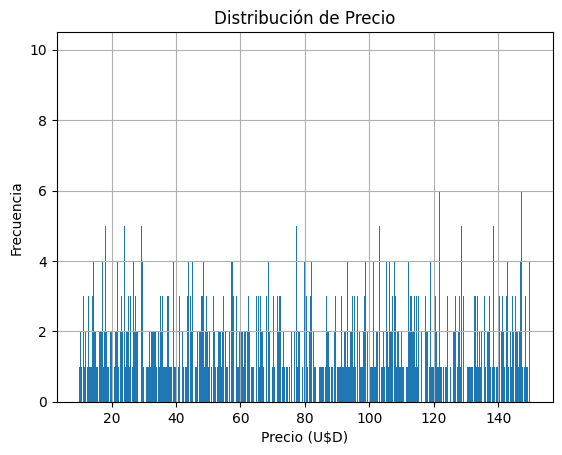

In [38]:
plt.pyplot.hist(df1['Price_USD'], bins=len(df1.Price_USD.unique()))
plt.pyplot.title('Distribución de Precio')
plt.pyplot.xlabel('Precio (U$D)')
plt.pyplot.ylabel('Frecuencia')
plt.pyplot.grid(True)

plt.pyplot.show()

In [10]:
priceRange = calc.rangeInterQrtl(df1['Price_USD'])
print(priceRange)

priceOutliers = calc.dropOutliers(priceRange, df1['Price_USD'], df1)
priceOutliers

[np.float64(-58.440000000000005), np.float64(218.68)]


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin


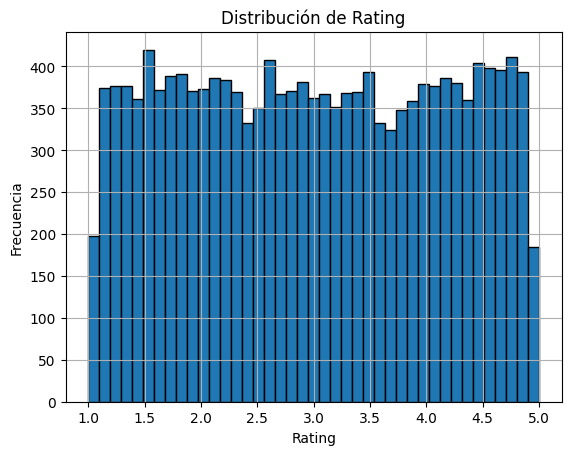

In [11]:
plt.pyplot.hist(df1['Rating'], bins=len(df1.Rating.unique()), edgecolor='black')
plt.pyplot.title('Distribución de Rating')
plt.pyplot.xlabel('Rating')
plt.pyplot.ylabel('Frecuencia')
plt.pyplot.grid(True)

plt.pyplot.show()

In [12]:
ratingRange = calc.rangeInterQrtl(df1['Rating'])
print(ratingRange)

ratingOutliers = calc.dropOutliers(ratingRange, df1['Rating'], df1)
ratingOutliers

[np.float64(-1.0), np.float64(7.0)]


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin


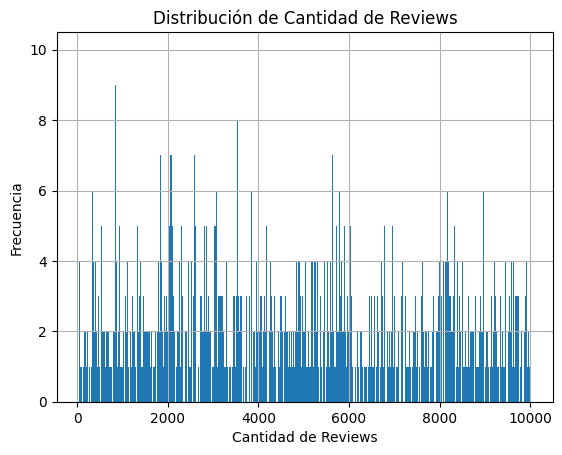

In [13]:
plt.pyplot.hist(df1['Number_of_Reviews'], bins=len(df1.Number_of_Reviews.unique()))
plt.pyplot.title('Distribución de Cantidad de Reviews')
plt.pyplot.xlabel('Cantidad de Reviews')
plt.pyplot.ylabel('Frecuencia')
plt.pyplot.grid(True)

plt.pyplot.show()

In [14]:
reviewsRange = calc.rangeInterQrtl(df1['Number_of_Reviews'])
print(reviewsRange)

reviewsOutliers = calc.dropOutliers(reviewsRange, df1['Number_of_Reviews'], df1)
reviewsOutliers

[np.float64(-4840.5), np.float64(14899.5)]


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin


In [41]:
sorted(calc.freqColumns(df1['Product_Size']).items())

[(30, 2540), (50, 2501), (100, 2551), (150, 2487), (200, 2423), (250, 2498)]

In [16]:
sizeRange = calc.rangeInterQrtl(df1['Product_Size'])
print(sizeRange)

sizeOutliers = calc.dropOutliers(reviewsRange, df1['Product_Size'], df1)
sizeOutliers

[np.float64(-175.0), np.float64(425.0)]


,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin


In [17]:
df1.describe(include=['object'])

,Product_Name,Brand,Category,Usage_Frequency,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Country_of_Origin
count,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,120,40,24,4,5,3,6,7,8
top,Super Setting Spray,Milk Makeup,Serum,Occasional,Combination,Male,Jar,Retinol,Italy
freq,154,426,710,3794,3060,5017,2567,2180,1942


In [46]:
sorted(calc.freqColumns(df1.Brand).items(), key=lambda x:x[1],reverse=True)

[('Milk Makeup', 426),
 ('Make Up For Ever', 414),
 ('Kiehl’s', 411),
 ('NARS', 400),
 ('Farsali', 399),
 ('E.l.f.', 399),
 ('Yves Saint Laurent', 394),
 ('Sisley', 392),
 ('Bite Beauty', 392),
 ('Morphe', 392),
 ('KVD Beauty', 391),
 ('Glossier', 388),
 ('Becca', 388),
 ('Huda Beauty', 384),
 ('RMS Beauty', 382),
 ('Bobby Brown', 380),
 ('Ilia Beauty', 379),
 ('Clinique', 377),
 ('Rare Beauty', 375),
 ('Tatcha', 374),
 ('Too Faced', 371),
 ('Kylie Cosmetics', 370),
 ('Shiseido', 370),
 ('Anastasia Beverly Hills', 369),
 ('Juvia’s Place', 368),
 ('Drunk Elephant', 368),
 ('Fenty Beauty', 366),
 ('Hourglass', 366),
 ('Natasha Denona', 366),
 ('Charlotte Tilbury', 364),
 ('Tarte', 361),
 ('Danessa Myricks', 358),
 ('Bourjois', 357),
 ('Urban Decay', 356),
 ('Laura Mercier', 355),
 ('Perricone MD', 349),
 ('IT Cosmetics', 346),
 ('Patrick Ta', 345),
 ('Pat McGrath Labs', 330),
 ('ColourPop', 328)]

In [47]:
sorted(calc.freqColumns(df1['Category']).items(), key=lambda x:x[1], reverse=True)

[('Serum', 710),
 ('Mascara', 674),
 ('Face Oil', 671),
 ('Highlighter', 653),
 ('Face Mask', 653),
 ('Moisturizer', 638),
 ('Makeup Remover', 636),
 ('Lipstick', 633),
 ('Concealer', 633),
 ('Bronzer', 631),
 ('Eyeliner', 629),
 ('Blush', 628),
 ('Setting Spray', 622),
 ('Cleanser', 614),
 ('Foundation', 613),
 ('BB Cream', 613),
 ('Lip Liner', 610),
 ('Primer', 606),
 ('Contour', 604),
 ('Powder', 599),
 ('CC Cream', 594),
 ('Exfoliator', 583),
 ('Eye Shadow', 582),
 ('Lip Gloss', 571)]

In [49]:
sorted(calc.freqColumns(df1['Usage_Frequency']).items(), key=lambda x:x[1], reverse=True)

[('Occasional', 3794), ('Monthly', 3781), ('Weekly', 3757), ('Daily', 3668)]

In [50]:
sorted(calc.freqColumns(df1['Skin_Type']).items(), key=lambda x:x[1], reverse=True)

[('Combination', 3060),
 ('Oily', 3009),
 ('Normal', 2991),
 ('Sensitive', 2975),
 ('Dry', 2965)]

In [51]:
sorted(calc.freqColumns(df1['Gender_Target']).items(), key=lambda x:x[1], reverse=True)

[('Male', 5017), ('Female', 5002), ('Unisex', 4981)]

In [52]:
sorted(calc.freqColumns(df1['Packaging_Type']).items(), key=lambda x:x[1], reverse=True)

[('Jar', 2567),
 ('Bottle', 2532),
 ('Stick', 2529),
 ('Spray', 2528),
 ('Compact', 2454),
 ('Tube', 2390)]

In [53]:
sorted(calc.freqColumns(df1['Main_Ingredient']).items(), key=lambda x:x[1], reverse=True)

[('Retinol', 2180),
 ('Glycerin', 2174),
 ('Vitamin C', 2168),
 ('Salicylic Acid', 2149),
 ('Shea Butter', 2148),
 ('Aloe Vera', 2091),
 ('Hyaluronic Acid', 2090)]

In [54]:
sorted(calc.freqColumns(df1['Country_of_Origin']).items(), key=lambda x:x[1], reverse=True)

[('Italy', 1942),
 ('USA', 1931),
 ('Australia', 1873),
 ('France', 1863),
 ('Japan', 1861),
 ('South Korea', 1851),
 ('UK', 1846),
 ('Germany', 1833)]

In [ ]:
df1.describe(include=['bool'])

,Cruelty_Free
count,15000
unique,2
top,False
freq,7592


In [27]:
calc.freqColumns(df1['Cruelty_Free'])

{False: 7592, True: 7408}